## Aula 4 - Esfera de Bloch e Quiskit

#### Curso de Extensão - Computação Quântica para Leigos
`Documentado por Fernanda Ribeiro`

---
**Assunto**: Esfera de Bloch e Quiskit <br>
**Data**: 11/06/2022 <br>

**Professores**: <br>
Prof. Gustavo Arruda <br>
Prof. Felipe Fernandes Franchini <br>
Prof. Marcos Cesar de Oliveira

---

### Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi

from scipy import linalg as lng
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

---
### Esfera de Bloch

Considerando o estado $| 0 \rangle$ e $| 1 \rangle$, 

$$| 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \mbox{ e } | 1 \rangle= \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

In [2]:
v0 = np.array([[1],[0]])
print('v0: \n',v0)

v1 = np.array([[0],[1]])
print('v1: \n',v1)

v0: 
 [[1]
 [0]]
v1: 
 [[0]
 [1]]


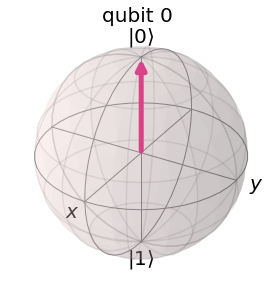

In [3]:
state = qi.Statevector(v0)
plot_bloch_multivector(state)

O estado $\phi$, formalismo de Bloch, pode ser definido como:

$$| \psi ⟩ = cos(\frac{\theta}{2})|0⟩ + sin(\frac{\theta}{2})e^{i\phi}|1⟩$$

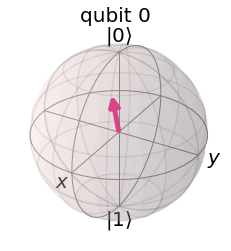

In [4]:
theta = np.pi/5
phi = np.pi/8

psi = np.cos(theta/2)*v0 + np.sin(theta/2)*np.exp(1j*phi)*v1
state = qi.Statevector(psi)
plot_bloch_multivector(state)

Relembrando da última aula,

- Qubit - Operadores de Pauli

$$ | \varphi \rangle = a | 0 \rangle + b | 1 \rangle$$

Exemplos de operadores unitários:

$$ I = \sigma_0 = | 0 \rangle \langle 0 | +  | 1 \rangle \langle 1 | = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \rightarrow \mbox{identidade}$$

$$ X = \sigma_1 = \sigma_x = | 1 \rangle \langle 0 | +  | 0 \rangle \langle 1 | = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \rightarrow \mbox{bit-flip}$$

$$ Y = \sigma_2 = \sigma_y = i \big{(} | 1 \rangle \langle 0 | -  | 0 \rangle \langle 1 | \big{)} = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \rightarrow \mbox{bit-phase-flip}$$

$$ Z = \sigma_3 = \sigma_z = | 0 \rangle \langle 0 | -  | 1 \rangle \langle 1 |  = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \rightarrow \mbox{phase-flip}$$

A porta lógica de Hadamard é representada pela matriz H:

$$ H = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Então, $ H| 0 \rangle$ é:
$$ H| 0 \rangle = \frac{1}{\sqrt 2} |0 \rangle + \frac{1}{\sqrt 2} |1 \rangle$$


In [5]:
Had = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
Had

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [6]:
Z = np.array([[1,0],[0,-1]])
Z

array([[ 1,  0],
       [ 0, -1]])

In [7]:
X = np.array([[0,1],[1,0]])
X

array([[0, 1],
       [1, 0]])

$$ | \phi (0) \rangle = a.|0 \rangle \rightarrow^{t} b.|1 \rangle$$

In [8]:
tempo = np.pi/3
U = lng.expm(-1j*Had*tempo)
U@v0

array([[5.00000000e-01-0.61237244j],
       [2.77555756e-17-0.61237244j]])

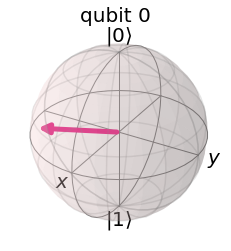

In [9]:
state = qi.Statevector(U@v0)
plot_bloch_multivector(state)

- Dinâmica do estado

In [10]:
psi11 = list()
psi21 = list()
time = list()

for k in range(640):
    t = 0.01*k
    U = lng.expm(-1j*Had*t)
    psi = U@v0
    
    time.append(t)
    psi11.append(np.abs(psi[0,0]))
    psi21.append(np.abs(psi[1,0]))

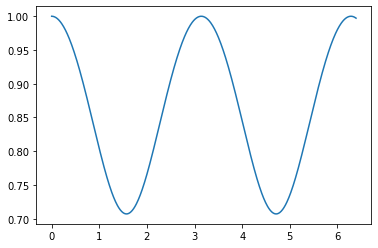

In [11]:
plt.plot(time,psi11)

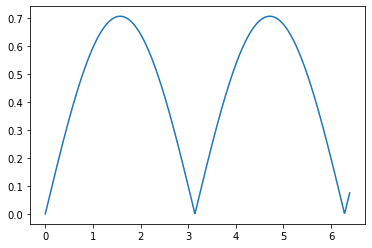

In [12]:
plt.plot(time,psi21)

### Conectando um computador quântico na IBM

Para acessa o computador quântico é necessário fazer login no site e gerar o API Token:

https://quantum-computing.ibm.com/

Insira o API Token no local indicado

In [13]:
from qiskit import IBMQ
import getpass

IBMQ.save_account(getpass.getpass(prompt='API Token: ', stream=None))
IBMQ.load_account()

API Token: ········


configrc.store_credentials:WARNING:2022-06-20 19:23:47,139: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

https://qiskit.org/documentation/apidoc/circuit_library.html

In [14]:
circuit = QuantumCircuit(1,1)

In [15]:
circuit.h(0)
circuit.x(0)

In [16]:
circuit.measure(0,0)

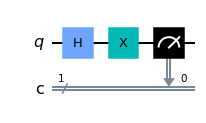

In [17]:
circuit.draw(output='mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')

- Executando o circuito

In [19]:
execute(circuit, backend = simulator)

In [20]:
result = execute(circuit, shots = 10000, backend = simulator).result()

In [21]:
result.get_counts(circuit)

{'0': 5013, '1': 4987}

In [22]:
provider = IBMQ.get_provider('ibm-q')

In [23]:
v0 = np.array([[1],[0]])
v1 = np.array([[0],[1]])
Had = (1/np.sqrt(2.))*np.array([[1,1],[1,-1]])
X = np.array([[0,1],[1,0]])

from ipywidgets import interact
def dynamic(vector, Ham):
    @interact
    def update(t = (0,np.pi/2,np.pi/10)):
        U = lng.expm(-1j*Ham*t) # t = t/(h/2*pi)
        state = qi.Statevector(U@vector)
        return plot_bloch_multivector(state)
dynamic(v0,X)

interactive(children=(FloatSlider(value=0.6283185307179586, description='t', max=1.5707963267948966, step=0.31…

- Avaliar os backends disponíveis

In [24]:
available_cloud_backends = provider.backends() 
for i in available_cloud_backends: print(i)

ibmq_qasm_simulator
ibmq_armonk
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo


- Executando no computador quântico da IBM

In [25]:
qcomp = provider.get_backend('ibmq_lima')

In [26]:
job = execute(circuit,shots=2000,backend=qcomp)

- Avalia o status da execução

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
job_monitor(job)

Job Status: job has successfully run


- Obtém os resultados

In [29]:
result = job.result()

In [30]:
result.get_counts()

{'0': 1096, '1': 904}

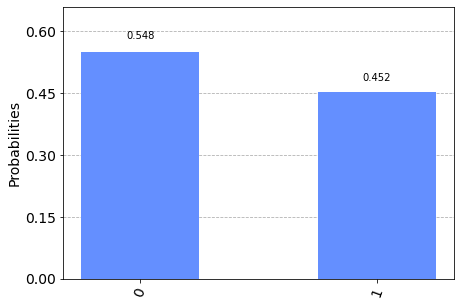

In [32]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

Computação Quântica: https://youtube.com/playlist?list=PLRVpyBCu8Zmk5pvpdfDJ2a73_9GRMqMyY